# Example EasyLens Worksheet

Welcome to EasyLens! This notebook will take you through all the steps in modeling a strong lens system using in multi-band survey data.

## 1. Set up your workbench

First we need to make sure we have all the software we need, and also get the data that we will be working on. The first step is to `pip install` all the packages in `requirements.txt`, like this:
```
pip install -r requirements.txt
```
Next, you'll need to do
```
python setup.py install
```
from the top level EasyLens directory to get all the EasyLens code onto your PYTHONPATH.

Once this is all done, you can run this notebook, starting with the following `import` cell.

In [1]:
# External modules - try "pip install <module>" if you get an error.
import astropy.io.fits as pyfits
import astropy.wcs as pywcs
import pickle
import numpy as np
import os
import easylens

# It'll make the notebook clearer if we get a few tools out and give them easy names:
from easylens.Data.lens_system import LensSystem
from easylens.Data.show_lens import ShowLens
from easylens.Data.exposure import Exposure
import easylens.util as util

# We'll be doing some plotting:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable

/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## 2.  Which lens are we going to model?

In this example, we'll use the system whose cutout images have been checked into the `data` directory. In future, we'll provide code to download any set of images you want to model. In either case we need to specify the lens *name*, and the *bandpasses* we'll be using.

In [2]:
LENS = 'DESJ033056.9318-522813.0188'
FILTERS = ['g','r','i','z']

In [3]:
# When the data is local, we just need to specify the path to the data folders. 
DATA_DIR = '../data/'+LENS

In [4]:
# Now we can set up our file names, stored in a dictionary to enable reference by filter:
SCIFILE = {}
WHTFILE = {}
PSFFILE = {}
for filter in FILTERS:
    SCIFILE[filter] = DATA_DIR+'/'+LENS+'_'+filter+'_sci.fits'
    WHTFILE[filter] = DATA_DIR+'/'+LENS+'_'+filter+'_wht.fits'
    PSFFILE[filter] = DATA_DIR+'/'+LENS+'_'+filter+'_psf.fits'

## 3. Make a lens system object

Here's where we start making our model. We'll need to give it some images, and tell it where on the sky it is.

In [5]:
# Get the sky position from one of the science images:
ra_center, dec_center = util.get_ra_dec_center(SCIFILE['g'])

# Initialize the model:
lensSystem = LensSystem(name="object03", ra=ra_center, dec=dec_center)

RADECSYS is non-standard, use RADESYSa.


RADECSYS is non-standard, use RADESYSa. [astropy.wcs.wcs]


The lens system now needs to be given the images we have of it. Each cutout image needs to be accompanied by a 'weight' (`wht`) and PSF (`psf`) image; the `Exposure` class stores all three of these images together.  

In [6]:
# Let's keep the images in a dictionary, so we can refer to them by filter.
image = {}

for filter in FILTERS:

    # Set up an image object for this filter:
    image[filter] = Exposure(lensSystem.ra, lensSystem.dec)    
    image[filter].load_all(SCIFILE[filter],PSFFILE[filter],WHTFILE[filter])

    # Add this image to the model:
    lensSystem.add_image_data(image[filter], filter+'_band')

No filter file found, using default filter
No NNW file found, using default NNW config
WARNING

: FITSFixedWarning: 'datfix' made the change 'Changed '' to '2013-10-28T06:36:09.476''. [astropy.wcs.wcs]
No filter file found, using default filter
No NNW file found, using default NNW config
WARNING

: FITSFixedWarning: 'datfix' made the change 'Changed '' to '2013-09-13T09:27:55.306''. [astropy.wcs.wcs]
No filter file found, using default filter
No NNW file found, using default NNW config
WARNING

: FITSFixedWarning: 'datfix' made the change 'Changed '' to '2013-11-14T04:46:19.291''. [astropy.wcs.wcs]
No filter file found, using default filter
No NNW file found, using default NNW config


### show images

/Users/sibirrer/Cosmology/Software/EasyLens/easylens/Data/show_lens.py:43: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image*mask), origin='lower')#, extent=[0, deltaPix*numPix, 0, deltaPix*numPix])
/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


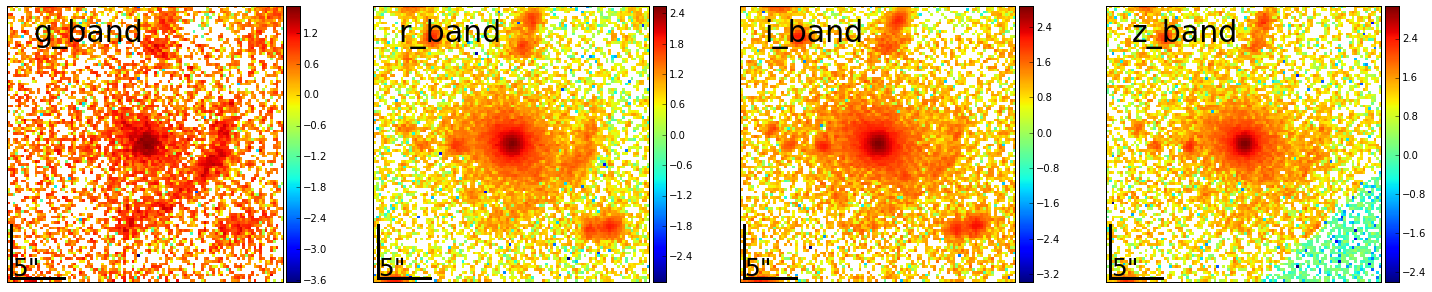

In [7]:
showLens = ShowLens(lensSystem)

f, axes = showLens.show_images()
plt.show()

### assign masks for different objects

/Users/sibirrer/Cosmology/Software/EasyLens/easylens/Data/show_lens.py:43: RuntimeWarning: divide by zero encountered in log10
  im = ax.matshow(np.log10(image*mask), origin='lower')#, extent=[0, deltaPix*numPix, 0, deltaPix*numPix])


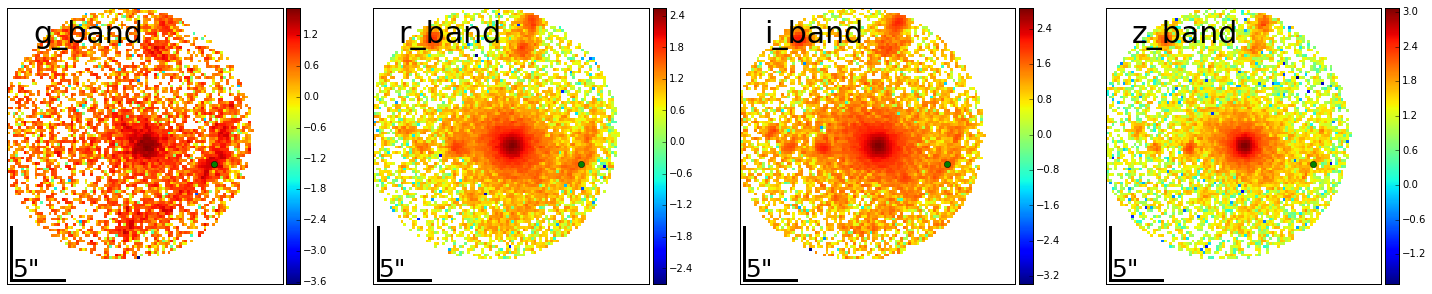

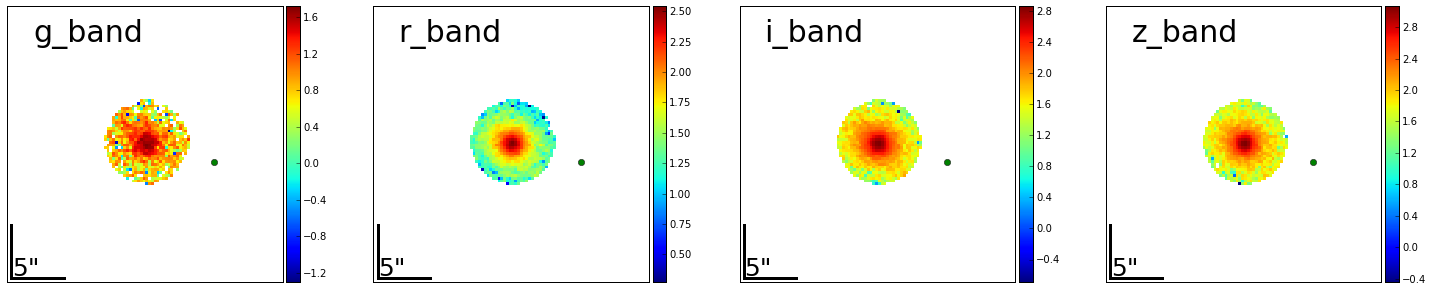

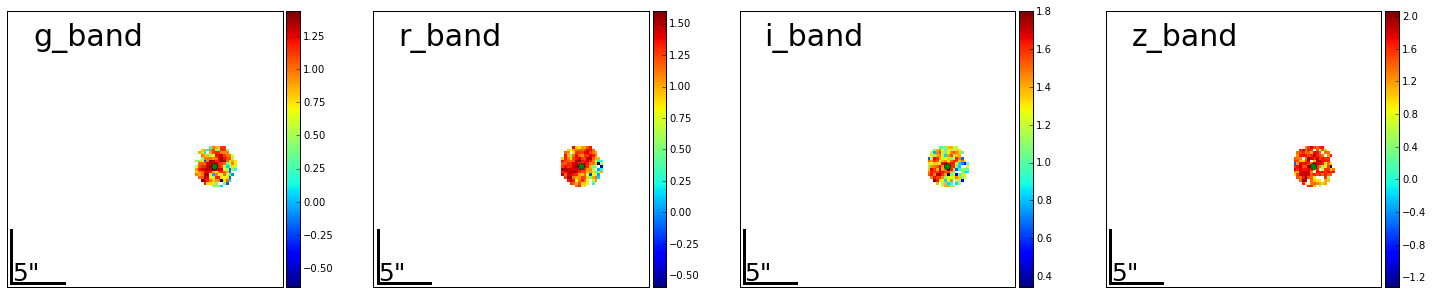

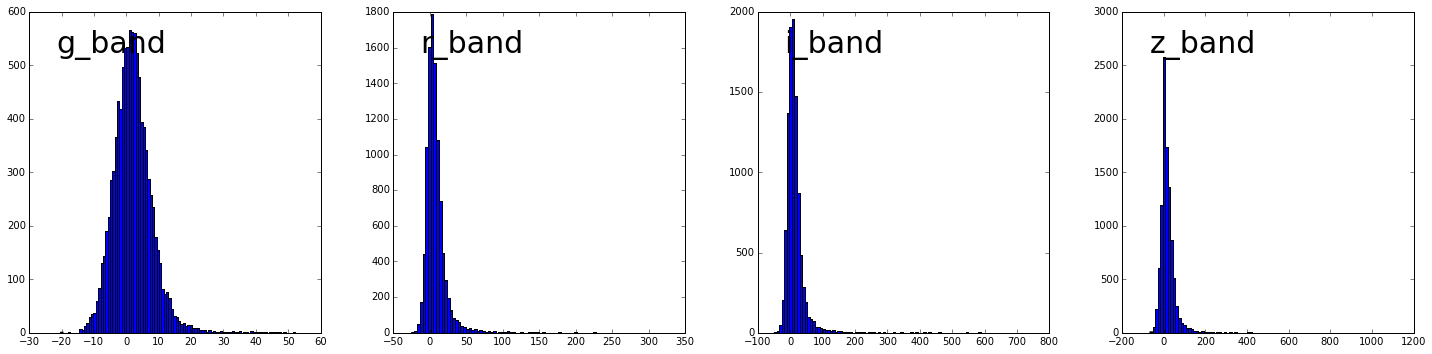

In [8]:
ra_pos_2 = -6.5
dec_pos_2 = -1.8
kwargs_mask = {"type": "circular", "ra_c": 2, "dec_c": 1, "width": 10, "radius": 12}
kwargs_mask_source1 = {"type": "circular", "ra_c": 0, "dec_c": 0, "width": 10, "radius": 4}
kwargs_mask_source2 = {"type": "circular", "ra_c": ra_pos_2, "dec_c": dec_pos_2, "width": 10, "radius": 2}



f, axes = showLens.show_images(ra_pos_2, dec_pos_2, kwargs_mask)
plt.show()

f, axes = showLens.show_images(ra_pos_2, dec_pos_2, kwargs_mask_source1)
plt.show()

f, axes = showLens.show_images(ra_pos_2, dec_pos_2, kwargs_mask_source2)
plt.show()

f, axes = showLens.show_pixel_hist()
plt.show()

In [9]:
from easylens.easylens import EasyLens
easyLens = EasyLens(lensSystem, frame_bool = {"g_band": True, "r_band": True, "i_band": True,
            "Y_band": False, "z_band": True}, subgrid_res=2)

w_SED1 = lensSystem.get_sed_estimate(ra_pos=0, dec_pos=0)
w_SED2 = lensSystem.get_sed_estimate(ra_pos_2, dec_pos_2)
print w_SED1, w_SED2
from easylens.easylens import Source

{'g_band': 15.265325, 'r_band': 82.567078, 'z_band': 219.81477, 'i_band': 156.2663} {'g_band': 6.9567842, 'r_band': 13.53226, 'z_band': 29.379051, 'i_band': 19.896832}


### SED modeling of source 1 (primary the lensing galaxy)

/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:262: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  image_un_convolve += source.get_lensed_unconvolved(param_array[num:num+numParam], ra_grid, dec_grid, frame, self._kwargs_lens, mask=mask)
/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:288: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  source_image = source.get_unconvolved(param_array[num:num+numParam], ra_grid, dec_grid, frame, self._kwargs_lens, mask=mask)


source with name source1 added
source with name source2 not found
source with name source1 deleted
source with name source1 added
0
3.51642663564
residual images


/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:202: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  param = param_array[num:num+numParam]


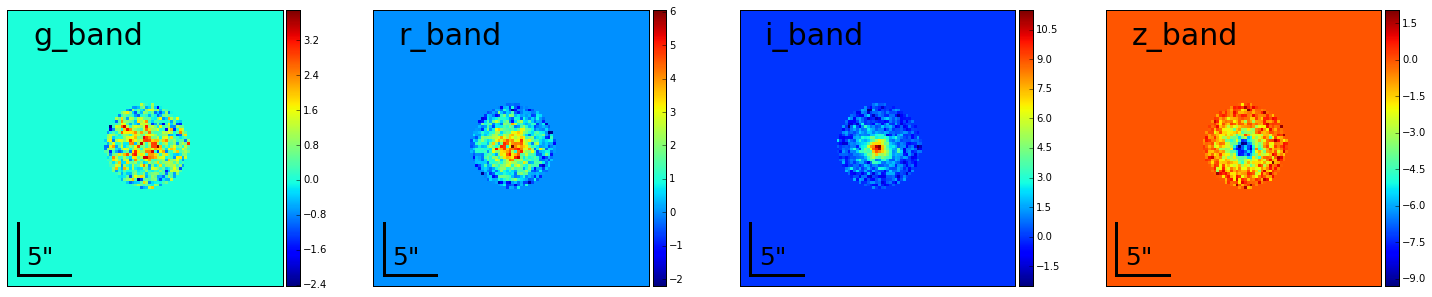

sources


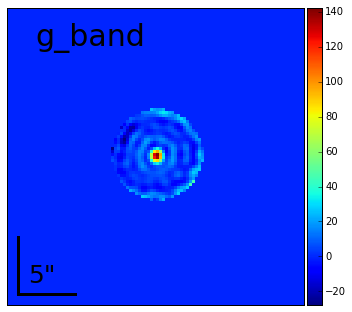

In [10]:
ra_pos_1 = 0
dec_pos_1 = 0
beta_1 = 1.5
n_max_1 = 20

source1 = Source(name="source1", ra_pos=ra_pos_1, dec_pos=dec_pos_1, beta=beta_1, n_max=n_max_1, w_SED=w_SED1, lens_bool=False)
easyLens.add_source(source1, over_write=True)
easyLens.del_source("source2")
easyLens.update_mask(kwargs_mask_source1)
numPix = easyLens.get_pixels_unmasked()
d = easyLens.get_data_vector()
C_D_inv = easyLens.get_C_D_inv_vector()

for i in range(1):
    A = easyLens.get_response()
    param_array, model_array = easyLens.get_inverted(A, C_D_inv, d)

    data_list = easyLens.get_data_list()
    model_list = easyLens.get_model_images(model_array)
    residual_list = easyLens.get_residuals(model_array)
    de_convolved_list = easyLens.get_deconvolved(param_array)
    source_list_g = easyLens.get_sources_original(param_array, "g_band")    
    
    A_sed = easyLens.get_response_sed(param_array)
    param_sed_array, model_sed_array = easyLens.get_inverted(A_sed, C_D_inv, d)
    w_SED1 = {'g_band': param_sed_array[0], 'r_band': param_sed_array[1], 'i_band': param_sed_array[2], 'z_band': param_sed_array[3]}
    source1 = Source(name="source1", ra_pos=ra_pos_1, dec_pos=dec_pos_1, beta=beta_1, n_max=n_max_1, w_SED=w_SED1, lens_bool=False)
    easyLens.add_source(source1, over_write=True)


frame_list = easyLens.frame_list
print i
chi2 = np.sum((model_array-d)**2*C_D_inv)/numPix
print chi2
# residuals
print("residual images")
f, axes = showLens.show_list(residual_list, frame_list)
plt.show()

# sources separate
print("sources")
f, axes = showLens.show_list(source_list_g, ["g_band"])
plt.show()

### SED modeling of source 2 (primary the source galaxy)

source with name source1 deleted
source with name source1 added
source with name source2 not found
source with name source2 added
source with name source2 deleted
source with name source2 added
source with name source2 deleted
source with name source2 added
2
1.07412715614
residual images


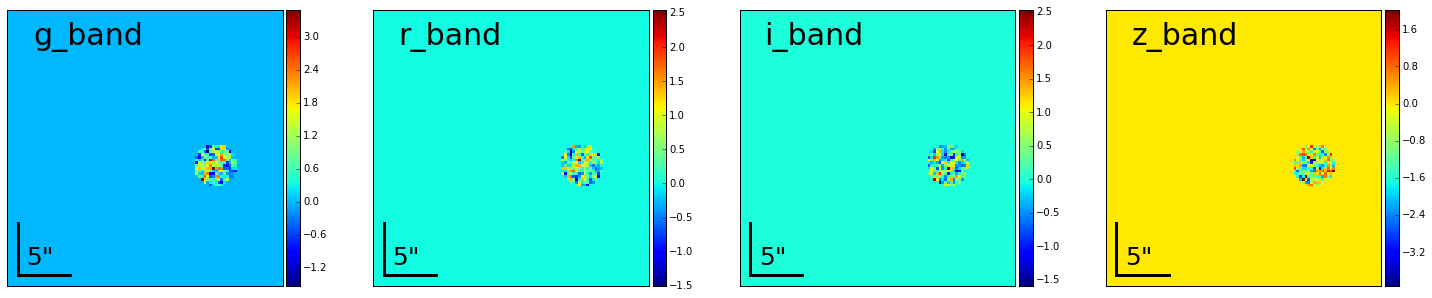

sources


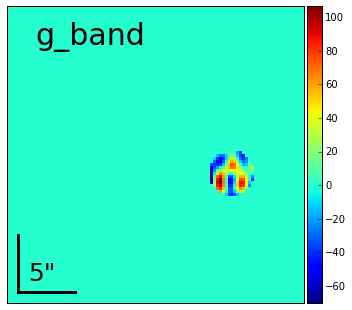

In [11]:
ra_pos_2 = ra_pos_2
dec_pos_2 = dec_pos_2
beta_2 = 1.
n_max_2 = 5

source2 = Source(name="source1", ra_pos=ra_pos_2, dec_pos=dec_pos_2, beta=beta_2, n_max=n_max_2, w_SED=w_SED2, lens_bool=False)
easyLens.add_source(source2, over_write=True)
easyLens.del_source("source2")
easyLens.update_mask(kwargs_mask_source2)
numPix = easyLens.get_pixels_unmasked()
d = easyLens.get_data_vector()
C_D_inv = easyLens.get_C_D_inv_vector()

for i in range(3):
    A = easyLens.get_response()
    param_array, model_array = easyLens.get_inverted(A, C_D_inv, d)

    data_list = easyLens.get_data_list()
    model_list = easyLens.get_model_images(model_array)
    residual_list = easyLens.get_residuals(model_array)
    de_convolved_list = easyLens.get_deconvolved(param_array)
    source_list_g = easyLens.get_sources_original(param_array, "g_band")    
    
    A_sed = easyLens.get_response_sed(param_array)
    param_sed_array, model_sed_array = easyLens.get_inverted(A_sed, C_D_inv, d)
    w_SED2 = {'g_band': param_sed_array[0], 'r_band': param_sed_array[1], 'i_band': param_sed_array[2], 'z_band': param_sed_array[3]}
    source2 = Source(name="source2", ra_pos=ra_pos_2, dec_pos=dec_pos_2, beta=beta_2, n_max=n_max_2, w_SED=w_SED2, lens_bool=False)
    easyLens.add_source(source2, over_write=True)


frame_list = easyLens.frame_list
print i
chi2 = np.sum((model_array-d)**2*C_D_inv)/numPix
print chi2
# residuals
print("residual images")
f, axes = showLens.show_list(residual_list, frame_list)
plt.show()

# sources separate
print("sources")
f, axes = showLens.show_list(source_list_g, ["g_band"])
plt.show()

## add sources together

In [12]:
beta=1.5
n_max = 15
source1 = Source(name="source1", ra_pos=0, dec_pos=0, beta=beta, n_max=n_max, w_SED=w_SED1, lens_bool=False)
source2 = Source(name="source2", ra_pos=ra_pos_2, dec_pos=dec_pos_2, beta=beta, n_max=n_max, w_SED=w_SED2, lens_bool=False)
easyLens.add_source(source1, over_write=True)
easyLens.add_source(source2, over_write=True)
easyLens.update_mask(kwargs_mask)

source with name source1 deleted
source with name source1 added
source with name source2 deleted
source with name source2 added


## joint fit (but unlensed)

In [13]:
d = easyLens.get_data_vector()
C_D_inv = easyLens.get_C_D_inv_vector()
A = easyLens.get_response()
param_array, model_array = easyLens.get_inverted(A, C_D_inv, d)

1.21469171169
original images


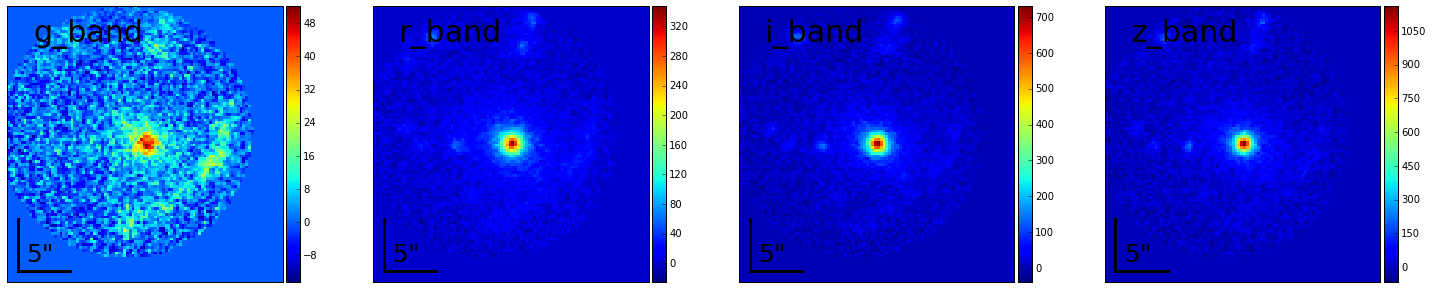

modeled images


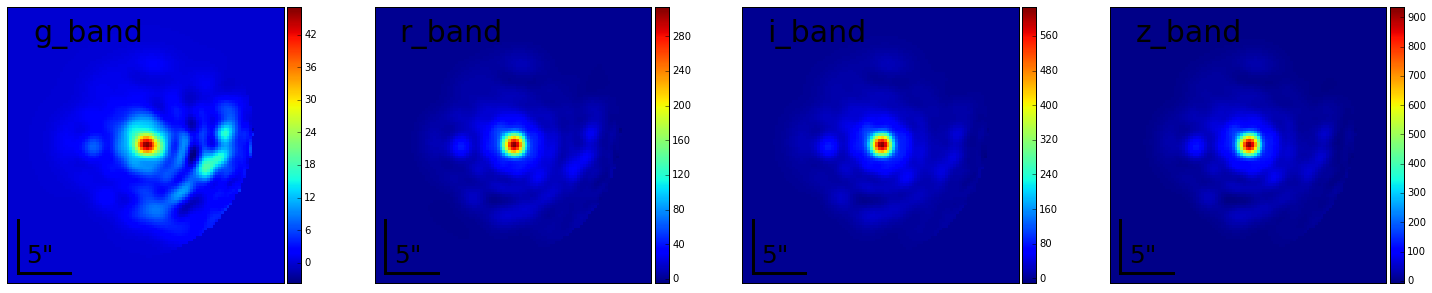

residual images


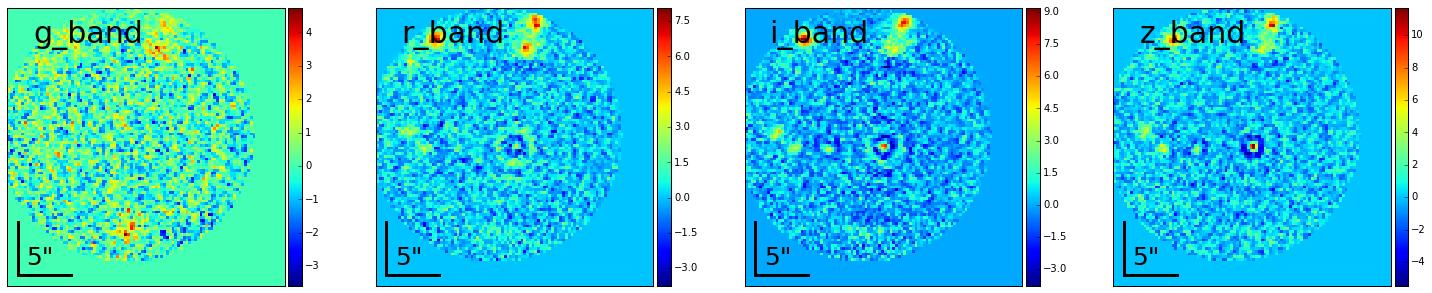

de-convolved images


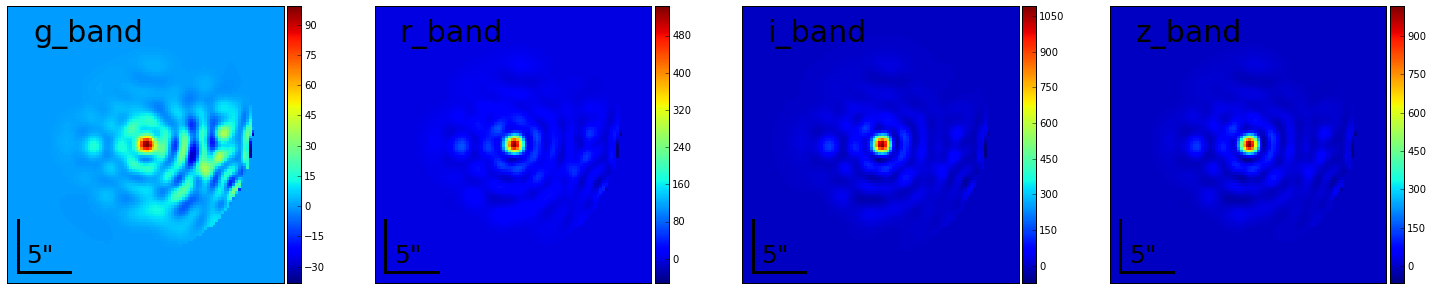

sources


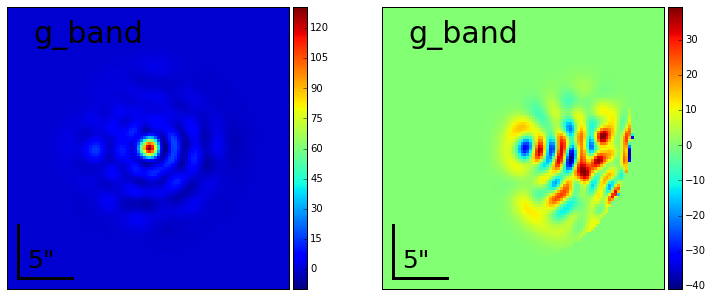

In [14]:
data_list = easyLens.get_data_list()
model_list = easyLens.get_model_images(model_array)
residual_list = easyLens.get_residuals(model_array)
de_convolved_list = easyLens.get_deconvolved(param_array)
source_list_g = easyLens.get_sources_original(param_array, "g_band")
frame_list = easyLens.frame_list

numPix = easyLens.get_pixels_unmasked()
chi2 = np.sum((model_array-d)**2*C_D_inv)/numPix
print chi2

# original images
print("original images")
f, axes = showLens.show_list(data_list, frame_list)
plt.show()


# modeled images
print("modeled images")
f, axes = showLens.show_list(model_list, frame_list)
plt.show()

# residuals
print("residual images")
f, axes = showLens.show_list(residual_list, frame_list)
plt.show()

# de-convolved images
print("de-convolved images")
f, axes = showLens.show_list(de_convolved_list, frame_list)
plt.show()

# sources separate
print("sources")
f, axes = showLens.show_list(source_list_g, ["g_band", "g_band"])
plt.show()

## joint and lensed fit

In [15]:
beta = 1.5
n_max = 5
source1 = Source(name="source1", ra_pos=0, dec_pos=0, beta=beta, n_max=n_max, w_SED=w_SED1, lens_bool=False)
source2 = Source(name="source2", ra_pos=ra_pos_2, dec_pos=dec_pos_2, beta=0.6, n_max=5, w_SED=w_SED2, lens_bool=True)
easyLens.add_source(source1, over_write=True)
easyLens.add_source(source2, over_write=True)
easyLens.update_mask(kwargs_mask)
update = False
if update is True:
    kwargs_lens = {"phi_E_sis": np.mean(samples[:,0]), "center_x_sis": np.mean(samples[:,1]), "center_y_sis": np.mean(samples[:,2])}
    print kwargs_lens
#kwargs_lens = {"phi_E_sis": 4.7, "center_x_sis": -0.55, "center_y_sis": -0.3}
else:
    kwargs_lens = {"phi_E_sis": 5.6, "center_x_sis": 0.7, "center_y_sis": 1.7}
easyLens.add_lens(kwargs_lens)

source with name source1 deleted
source with name source1 added
source with name source2 deleted
source with name source2 added
lens model parameters added


In [16]:
d = easyLens.get_data_vector()
C_D_inv = easyLens.get_C_D_inv_vector()
A = easyLens.get_response()
param_array, model_array = easyLens.get_inverted(A, C_D_inv, d)

1.74907312663
original images


/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:305: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  source_image = source.get_lensed_unconvolved(param_array[num:num+numParam], ra_grid, dec_grid, frame, self._kwargs_lens, mask=mask)
/Users/sibirrer/Cosmology/Software/EasyLens/easylens/easylens.py:325: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  source_image = source.get_response_single(ra_grid, dec_grid, psf_kwargs, numPix, deltaPix, self.subgrid_res, param=param_array[num:num+numParam], mask=mask, kwargs_lens=self._kwargs_lens)


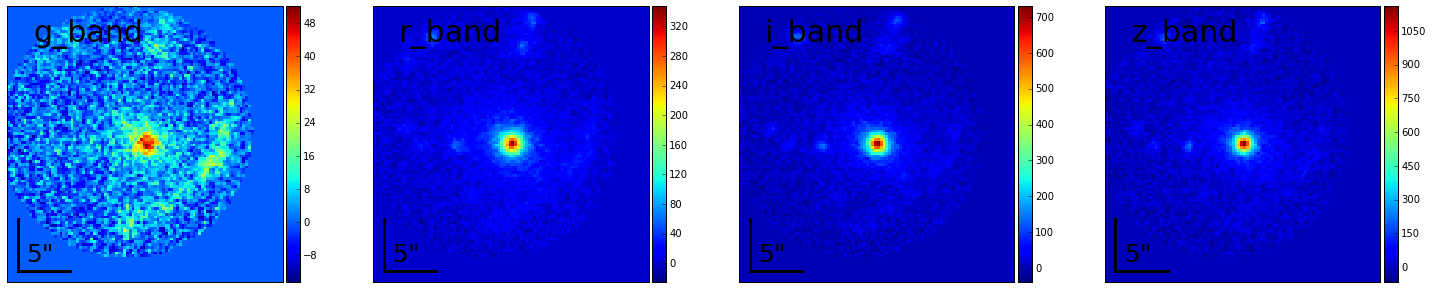

modeled images


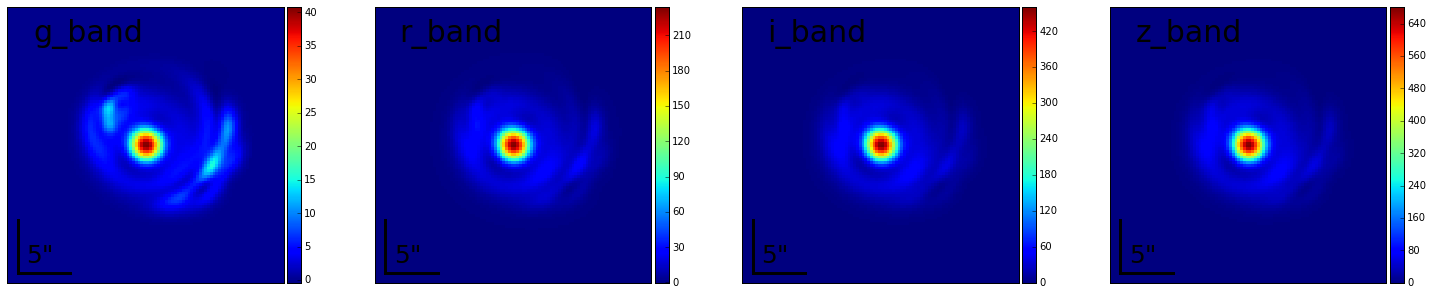

residual images


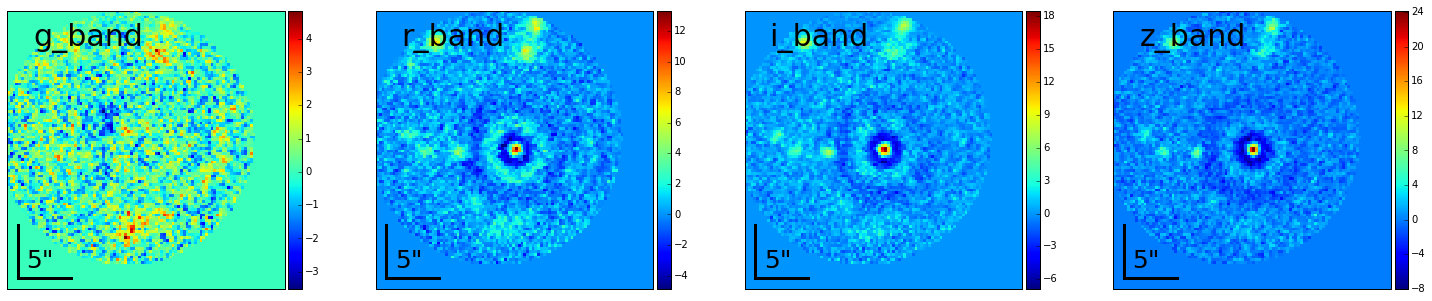

de-convolved images


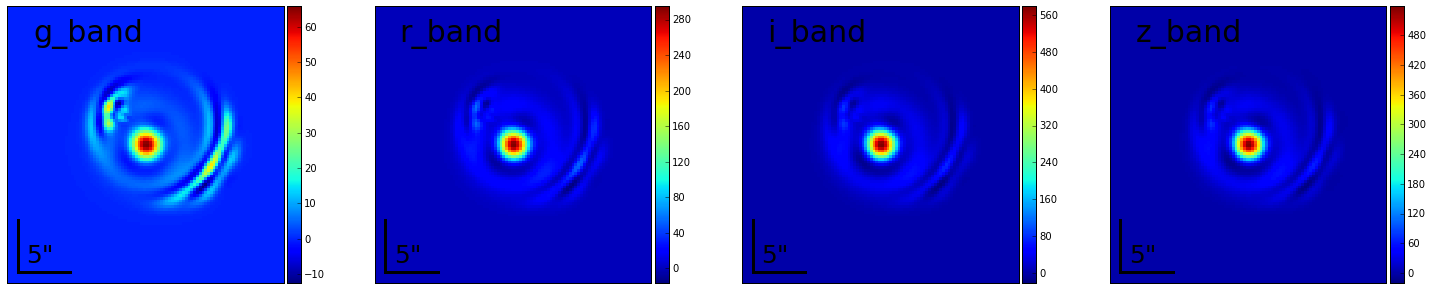

sources original


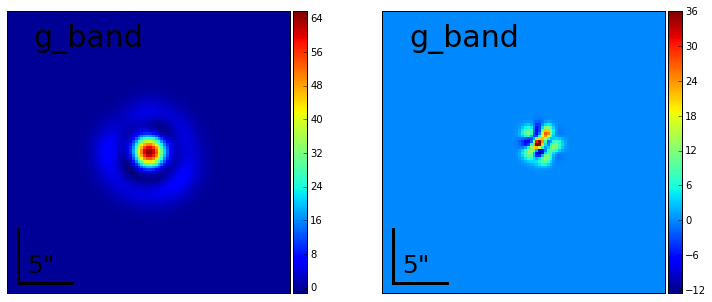

sources lensed


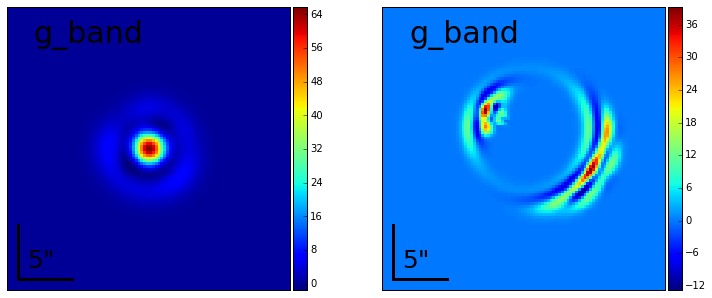

sources lensed and convolved


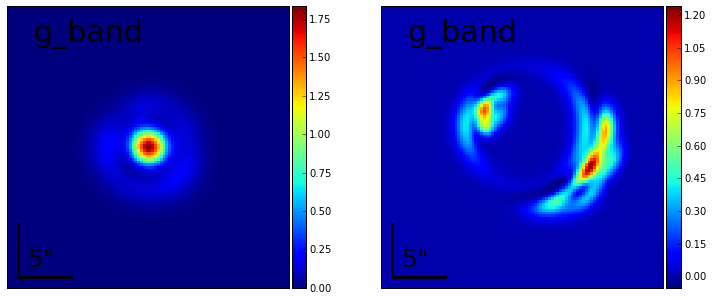

In [17]:
save_image = False
data_list = easyLens.get_data_list()
model_list = easyLens.get_model_images(model_array)
residual_list = easyLens.get_residuals(model_array)
de_convolved_list = easyLens.get_deconvolved(param_array)
source_list_original_g = easyLens.get_sources_original(param_array, "g_band")
source_list_lensed_g = easyLens.get_sources_lensed(param_array, "g_band")
source_list_image_g = easyLens.get_sources_image(param_array, "g_band")
frame_list = easyLens.frame_list

numPix = easyLens.get_pixels_unmasked()
chi2 = np.sum((model_array-d)**2*C_D_inv)/numPix
print chi2

# original images
print("original images")
f, axes = showLens.show_list(data_list, frame_list)
if save_image is True:
    plt.savefig('original_images.pdf', format='pdf')
plt.show()


# modeled images
print("modeled images")
f, axes = showLens.show_list(model_list, frame_list)
if save_image is True:
    plt.savefig('modeled_images.pdf', format='pdf')
plt.show()

# residuals
print("residual images")
f, axes = showLens.show_list(residual_list, frame_list)
if save_image is True:
    plt.savefig('residual_images.pdf', format='pdf')
plt.show()

# de-convolved images
print("de-convolved images")
f, axes = showLens.show_list(de_convolved_list, frame_list)
if save_image is True:
    plt.savefig('de_convolved_images.pdf', format='pdf')
plt.show()

# sources separate
print("sources original")
f, axes = showLens.show_list(source_list_original_g, ["g_band", "g_band"])
if save_image is True:
    plt.savefig('original_objects.pdf', format='pdf')
plt.show()


print("sources lensed")
f, axes = showLens.show_list(source_list_lensed_g, ["g_band", "g_band"])
if save_image is True:
    plt.savefig('lensed_objects.pdf', format='pdf')
plt.show()

print("sources lensed and convolved")
f, axes = showLens.show_list(source_list_image_g, ["g_band", "g_band"])
if save_image is True:
    plt.savefig('lensed_convolved_objects.pdf', format='pdf')
plt.show()

In [18]:
from easylens.Fitting.mcmc import MCMC_sampler
sampler = MCMC_sampler(easyLens, fix_center=False)
walkerRatio = 6
n_run = 10
n_burn = 10
mean_start = [5, 0, 0]
sigma_start = [2, 1, 1]
lowerLimit = [0, -10, -10]
upperLimit = [100, 10, 10]
samples = sampler.mcmc_CH(walkerRatio, n_run, n_burn, mean_start, sigma_start, lowerLimit, upperLimit, threadCount=1, init_pos=None, mpi_monch=False)

INFO:cosmoHammer:Using CosmoHammer 0.5.0
INFO:cosmoHammer:Using emcee 2.1.0
INFO:cosmoHammer:Sampler: <class 'cosmoHammer.CosmoHammerSampler.CosmoHammerSampler'>
configuration: 
  Params: [5 0 0]
  Burnin iterations: 10
  Samples iterations: 10
  Walkers ratio: 6
  Reusing burn in: False
  init pos generator: SampleBallPositionGenerator
  stop criteria: IterationStopCriteriaStrategy
  storage util: InMemoryStorageUtil
likelihoodComputationChain: 
Core Modules: 
  
Likelihood Modules: 
  MCMC_chain

INFO:cosmoHammer:start burn in
INFO:cosmoHammer:Iteration finished:10
INFO:cosmoHammer:storing random state
INFO:cosmoHammer:burn in sampling done! Took: 42.3008s
INFO:cosmoHammer:Mean acceptance fraction for burn in:0.3389
INFO:cosmoHammer:Reseting emcee sampler
INFO:cosmoHammer:start sampling after burn in
INFO:cosmoHammer:Iteration finished:10
INFO:cosmoHammer:sampling done! Took: 38.1363s
INFO:cosmoHammer:Mean acceptance fraction:0.2611


InMemoryStorageUtil does not support storeRandomState


/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)
/Users/sibirrer/Library/Python/2.7/lib/python/site-packages/matplotlib/collections.py:631: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


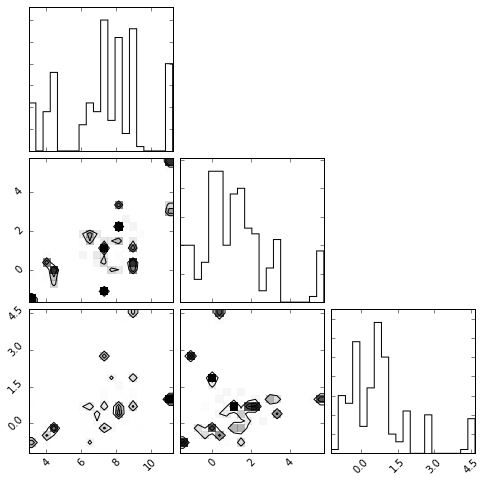

In [19]:
import corner

corner.corner(samples)
plt.show()